<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/NLP_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos de avaliações de filmes a partir de reviews do IMDB

- negativo
- positivo

In [1]:
import nltk
nltk.download('popular')
import pandas as pd
import numpy as np

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

# DataSet IMDB

In [2]:
df_imdb = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/imdb-reviews-pt-br.csv' )
df_imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
df_imdb_pt = df_imdb[ ['text_pt', 'sentiment'] ]
df_imdb_pt.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


## Vamos pegar o neg e pos e substituir por 0 e 1


In [4]:
df_imdb_pt.sentiment.unique()

array(['neg', 'pos'], dtype=object)

In [5]:
df_imdb_pt.sentiment.replace( { 'neg': 0, 'pos': 1 }, inplace=True )
df_imdb_pt.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [ ]:
df_imdb_pt.text_pt[0]

# Deixando tudo em minúsculo

In [7]:
df_imdb_pt['text_pt'] = df_imdb_pt['text_pt'].apply( str.lower )
df_imdb_pt.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0


# Modelo de referência

In [8]:
x = df_imdb_pt['text_pt'].values

In [9]:
y = df_imdb_pt['sentiment'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_test = train_test_split( x, y, test_size = 0.25 )

In [11]:
x_treino.shape

(37094,)

In [12]:
x_test.shape

(12365,)

In [13]:
x_treino[:2]

array(['os filmes egípcios tem um monte de filmes com alto nível de drama ou romance ou comédia ou ação até mesmo esportes ... "ziab la takohl al lam" foi banido no egito porque é conteúdo nudez total frontal feminina e este tipo de nudez é proibido nos filmes egípcios .. quando eu vi este filme eu senti abaixo ... história de tolo .. atriz nua .. má ação .. algum horror & cores duras .. caro amigo .. se você quer ver um grande filme egípcio .. .simplesmente: fique longe formulário "ziab la takohl al lam" .. temos grandes filmes no egito ... temos um grande ator que ganhou um global ganha como: omar el sheriff ou gameel rateb .. temos grandes diretores como " yousef shahin "então acredite em mim pall .. você não precisa ver este filme ..',
       'vi este filme recentemente e tinha maiores esperanças. não tanto baseado no diretor, que não havia feito um lançamento cinematográfico antes, mas mais baseado em seu elenco. harvey keitel, scott glenn e craig wasson protagonizam em body doubl

In [14]:
y_treino[:2]

array([0, 0])

# Criando Bag of Words ( BoW )

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( analyzer = 'word' )

In [16]:
vect.fit( x_treino ) 
# alternativa: vext.fit( x ) ?
# Resposta: Não, pois passando todo o x o modelo se adapta a dados novos.
# O conjunto de teste não contem toda a amostra desse vocabulário.
# O conjunto de teste serve para validar o modelo simulando a realidade, pois na realidade nao tem como saber quais palavras sao usadas.


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
print( vect.vocabulary_ )

In [18]:
print( len( vect.vocabulary_ ) )

114781


## Exemplo de uma avaliação

In [ ]:
df_imdb_pt.text_pt[0]

In [20]:
BoW_Exemplo = vect.transform( [ df_imdb_pt.text_pt[0] ] )
BoW_Exemplo

<1x114781 sparse matrix of type '<class 'numpy.int64'>'
	with 107 stored elements in Compressed Sparse Row format>

In [21]:
BoW_Exemplo.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

## BoW em todo o DataSet

In [22]:
box_x_treino = vect.transform( x_treino )
box_x_test = vect.transform( x_test )

In [23]:
box_x_treino
#  dimensao bate com os reviews 

<37094x114781 sparse matrix of type '<class 'numpy.int64'>'
	with 4965229 stored elements in Compressed Sparse Row format>

# Classificador 

In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [25]:
model.fit( box_x_treino, y_treino )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testando o modelo

In [26]:
texto_teste = [ 'O melhor filme da minha vida. Incrivel!',
               'O produtor realmente errou feio. Filme muito ruim.',
               'Adorei o filme, por mim ficaria horas no cinema.',
               'Filme meio parado, sem ação e não senti empatia pelos personagens.',
               'Horrivel',
               'Excelente', 
               'Muito bom o filme, só que não',
               'Muito ruim o filme, só que não',
               'top'
               ]

box_texto_teste = vect.transform( texto_teste )

In [27]:
saida_teste = model.predict( box_texto_teste )

dict_resp = { 0: 'Negativo', 1: 'Positivo' }

for i in saida_teste:
  print( dict_resp[i] )


Positivo
Negativo
Positivo
Negativo
Negativo
Positivo
Negativo
Negativo
Positivo


## Validando o modelo

In [28]:
print( model.score( box_x_treino, y_treino ) )
print( model.score( box_x_test, y_test ) )

0.9048363616757427
0.8498180347755763


In [29]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

### Treino

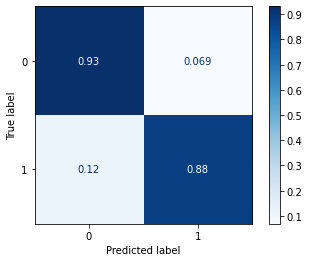

In [30]:
plot_confusion_matrix( estimator = model, X = box_x_treino, y_true = y_treino, normalize = 'true', cmap=plt.cm.Blues )

### Teste

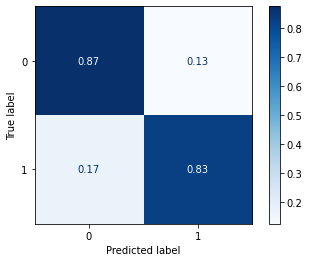

In [31]:
plot_confusion_matrix( estimator = model, X = box_x_test, y_true = y_test, normalize = 'true', cmap=plt.cm.Blues )

# Adicionando Pré-processamento ( Mine )

- Tornar possível usar algoritmos mais complexos para explorar esses dados que estão exparsos

- Diminuir a dimensionalidade

In [32]:
df_imdb_pt.head()

,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0


### Testes rápidos

In [33]:
# Corpus todo enviado como parametro
def stem(corpus):
  print(corpus)
  return corpus + "oooiiii"

vect_no_stopwords_stem = CountVectorizer( analyzer='word', preprocessor=stem )

In [ ]:
vect_no_stopwords_stem.fit_transform( x_treino )

In [35]:
vect_no_stopwords_stem.vocabulary_["oooiiii"]

78191

## Removendo Stopwords

In [36]:
from nltk.corpus import stopwords
from string import punctuation

In [37]:
stw = stopwords.words( 'portuguese' )

stw_pt = list( set( stw + list(punctuation) ) )
print(stw_pt)

['por', 'estivemos', 'houveram', 'estivesse', 'estive', 'houvesse', 'tenha', 'a', ']', 'estava', 'pelas', 'é', 'lhes', 'ou', '{', 'se', 'esta', 'às', 'estivermos', ';', 'houverei', 'estiver', 'essa', 'no', 'nossas', 'há', 'teus', 'hajam', 'você', 'havemos', 'quem', 'só', 'dos', 'são', 'seremos', 'terão', 'nossos', 'sua', 'minhas', 'isto', 'fui', 'teremos', 'este', 'tivera', 'como', 'sejam', 'qual', 'foi', 'tuas', 'hajamos', 'estas', 'estiveram', 'houver', 'numa', '"', '<', 'isso', 'estavam', 'as', 'estejam', 'tivemos', '$', '`', 'ele', 'fomos', ')', 'esteja', 'eu', 'nas', 'houveríamos', 'tivesse', 'nos', 'delas', 'vos', 'aquelas', 'seja', 'entre', '*', 'serão', 'houvera', 'seríamos', '~', 'e', 'tinham', 'estivessem', 'aos', 'estivéramos', 'foram', 'estivera', 'éramos', 'estávamos', 'sejamos', 'era', 'seria', 'tivéssemos', 'mesmo', 'houveremos', 'mas', 'até', 'terá', 'deles', 'em', 'à', 'na', 'serei', '#', 'esteve', 'nós', 'hão', 'houve', 'tivéramos', 'teu', 'num', 'não', 'houverá', '('

In [38]:
vect_no_stopwords = CountVectorizer( analyzer='word', stop_words = stw_pt )

In [39]:
vect_no_stopwords.fit(x_treino)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['por', 'estivemos', 'houveram', 'estivesse',
                            'estive', 'houvesse', 'tenha', 'a', ']', 'estava',
                            'pelas', 'é', 'lhes', 'ou', '{', 'se', 'esta', 'às',
                            'estivermos', ';', 'houverei', 'estiver', 'essa',
                            'no', 'nossas', 'há', 'teus', 'hajam', 'você',
                            'havemos', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
BoW_exemplo2 = vect_no_stopwords.transform( [ df_imdb_pt.text_pt[0] ] )
BoW_exemplo2

<1x114606 sparse matrix of type '<class 'numpy.int64'>'
	with 73 stored elements in Compressed Sparse Row format>

In [41]:
BoW_Exemplo

<1x114781 sparse matrix of type '<class 'numpy.int64'>'
	with 107 stored elements in Compressed Sparse Row format>

## Stemming

In [42]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [43]:
from nltk.stem import RSLPStemmer

stemmer = RSLPStemmer()

In [44]:
stemmer.stem('dançando')

'danç'

In [45]:
from nltk.tokenize import word_tokenize

def stem(corpus):
  w_tokenize = word_tokenize(corpus)
  res = ''
  for w in w_tokenize:
    res += stemmer.stem(w)+" "
  return res

In [46]:
print(stem('senhoras e senhores, hora do Faustão'))

senh e senh , hor do faust 


In [47]:
vect_no_stopwords_stem = CountVectorizer( analyzer = 'word', stop_words = stw_pt, preprocessor = stem )

In [48]:
vect_no_stopwords_stem.fit( x_treino )

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aquel', 'aquil', 'del', 'entr', 'er', 'ess', 'est', 'estej', 'estev', 'estiv', 'estivér', 'estivéss', 'fom', 'form', 'foss', 'fôr', 'fôss', 'haj', 'hav', 'houv', 'houvér', 'houvéss', 'iss', 'ist', 'mesm', 'minh', 'muit', 'noss', 'nó', 'par', 'pel', 'qu', 'sej', 'ser', 'som', 'tenh', 'ter', 'tev', 'tinh', 'tiv', 'tivér', 'tivéss', 'tính', 'vo', 'voc', 'ér'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1),
                preprocessor=<function stem at 0x7f9a653e6488>,
                stop_words=['por', 'estivemos', 'houveram', 'estivesse',
                            'estive', 'houvesse', 'tenha', 'a', ']', 'estava',
                            'pelas', 'é', 'lhes', 'ou', '{', 'se', 'esta', 'às',
                            'estivermos', ';', 'houverei', 'estiver', 'essa',
                            'no', 'nossas', 'há', 'teus', 'hajam', 'você',
                            'havemos', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [49]:
BoW_exemplo3 = vect_no_stopwords_stem.transform( [ df_imdb_pt.text_pt[0] ] )
BoW_exemplo3

<1x67791 sparse matrix of type '<class 'numpy.int64'>'
	with 72 stored elements in Compressed Sparse Row format>

In [ ]:
vect_no_stopwords_stem.vocabulary_

In [51]:
BoW_Exemplo

<1x114781 sparse matrix of type '<class 'numpy.int64'>'
	with 107 stored elements in Compressed Sparse Row format>

In [52]:
BoW_exemplo2

<1x114606 sparse matrix of type '<class 'numpy.int64'>'
	with 73 stored elements in Compressed Sparse Row format>

In [53]:
BoW_exemplo3

<1x67791 sparse matrix of type '<class 'numpy.int64'>'
	with 72 stored elements in Compressed Sparse Row format>

# Pré-processamento - Class Version

In [54]:
df_imdb_pt2 = df_imdb[ ['text_pt', 'sentiment'] ]

df_imdb_pt2.sentiment.replace( { 'neg': 0, 'pos': 1 }, inplace = True )

df_imdb_pt2['text_pt'] = df_imdb_pt['text_pt'].str.lower()
 
df_imdb_pt2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0


## Remoção de acentos, emojis e números

In [78]:
# Funções auxiliares para normalização de texto
import re
import unicodedata

def remove_emoji(string):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string)

def remove_acento( frase_tokenizada ):
  frase = []
  for palavra in frase_tokenizada:
    print('Palavra0: ' + palavra)
    palavra = palavra.replace('á','a')
    palavra = palavra.replace('é','e')
    palavra = palavra.replace('í','i')
    palavra = palavra.replace('ó','o')
    palavra = palavra.replace('ú','u')
    palavra = palavra.replace('ã','a')
    palavra = palavra.replace('õ','o')
    palavra = palavra.replace('ç','c')
    palavra = palavra.replace('â','a')
    palavra = palavra.replace('ê','e')
    palavra = palavra.replace('î','i')
    palavra = palavra.replace('ô','o')
    palavra = palavra.replace('û','u')
    palavra = palavra.replace('à','a')
    palavra = palavra.replace('è','e')
    palavra = palavra.replace('ì','i')
    palavra = palavra.replace('ò','o')
    palavra = palavra.replace('ù','u')
    print('Palavra1: ' + palavra)
    frase.append( palavra )
  
  return frase


def no_alphas( frase_tokenizada ):
  return [ palavra for palavra in frase_tokenizada if (palavra.isalpha()) ]



# mais performatica
def removerAcentosECaracteresEspeciais(palavra):
  
  # Unicode normalize transforma um caracter em seu equivalente em latin.
  nfkd = unicodedata.normalize('NFKD', palavra)
  palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

  # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
  return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

## Removendo emojis

In [56]:
df_imdb_pt2['text_pt'] = df_imdb_pt2['text_pt'].apply( remove_emoji )

df_imdb_pt2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0


#### **Demora**

In [57]:
df_imdb_pt2['token_pt'] = df_imdb_pt2['text_pt'].apply( word_tokenize )
df_imdb_pt2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_pt,sentiment,token_pt
0,"mais uma vez, o sr. costner arrumou um filme p...",0,"[mais, uma, vez, ,, o, sr., costner, arrumou, ..."
1,este é um exemplo do motivo pelo qual a maiori...,0,"[este, é, um, exemplo, do, motivo, pelo, qual,..."
2,"primeiro de tudo eu odeio esses raps imbecis, ...",0,"[primeiro, de, tudo, eu, odeio, esses, raps, i..."
3,nem mesmo os beatles puderam escrever músicas ...,0,"[nem, mesmo, os, beatles, puderam, escrever, m..."
4,filmes de fotos de latão não é uma palavra apr...,0,"[filmes, de, fotos, de, latão, não, é, uma, pa..."


## Removendo alphas - Por algum motivo não está funcionando, retorna uma lista de todas as letras

In [74]:
# df_imdb_pt2['token_pt'] = df_imdb_pt2['text_pt'].apply( no_alphas )
# df_imdb_pt2.head()

## Remove acentuação - retorna uma lista com todas as letras

In [ ]:
# df_imdb_pt2['token_pt'] = df_imdb_pt2['text_pt'].apply( remove_acento )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Remove acentuação e caracteres especiais

In [77]:
df_imdb_pt2['text_pt'] = df_imdb_pt2['text_pt'].apply( removerAcentosECaracteresEspeciais )
df_imdb_pt2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_pt,sentiment,token_pt
0,mais uma vez o sr costner arrumou um filme por...,0,"[mais, uma, vez, ,, o, sr., costner, arrumou, ..."
1,este e um exemplo do motivo pelo qual a maiori...,0,"[este, é, um, exemplo, do, motivo, pelo, qual,..."
2,primeiro de tudo eu odeio esses raps imbecis q...,0,"[primeiro, de, tudo, eu, odeio, esses, raps, i..."
3,nem mesmo os beatles puderam escrever musicas ...,0,"[nem, mesmo, os, beatles, puderam, escrever, m..."
4,filmes de fotos de latao nao e uma palavra apr...,0,"[filmes, de, fotos, de, latão, não, é, uma, pa..."


## A partir desse momento o dataframe está:
- Minúsculo
- Sem caracteres especiais
- Sem acento

## Remove Stopwords

In [79]:
def remove_stop_words( frase_tokenizada, stopwords_list_pt ):
  return [ palavra for palavra in frase_tokenizada if palavra not in stopwords_list_pt ]


In [80]:
df_imdb_pt2['token_pt'] = df_imdb_pt2['token_pt'].apply(remove_stop_words, stopwords_list_pt = stw_pt)

# df_imdb_pt2['token_pt'].apply( remove_stop_words, stopwords_list_pt = stw_pt, inplace=True )
df_imdb_pt2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_pt,sentiment,token_pt
0,mais uma vez o sr costner arrumou um filme por...,0,"[vez, sr., costner, arrumou, filme, tempo, nec..."
1,este e um exemplo do motivo pelo qual a maiori...,0,"[exemplo, motivo, maioria, filmes, ação, mesmo..."
2,primeiro de tudo eu odeio esses raps imbecis q...,0,"[primeiro, tudo, odeio, raps, imbecis, poderia..."
3,nem mesmo os beatles puderam escrever musicas ...,0,"[beatles, puderam, escrever, músicas, todos, g..."
4,filmes de fotos de latao nao e uma palavra apr...,0,"[filmes, fotos, latão, palavra, apropriada, ve..."


## Aplicando Stemming

In [81]:
from nltk.stem import RSLPStemmer

def stemming_pt( frase_tokenizada, stemmer ):
  frase = []
  for palavra in frase_tokenizada:
    frase.append( stemmer.stem(palavra) )

  return frase

In [82]:
df_imdb_pt2['token_pt'] = df_imdb_pt2['token_pt'].apply( stemming_pt, stemmer = stemmer )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df_imdb_pt2.head()

,text_pt,sentiment,token_pt
0,mais uma vez o sr costner arrumou um filme por...,0,"[vez, sr., costn, arrum, film, temp, necess, a..."
1,este e um exemplo do motivo pelo qual a maiori...,0,"[exempl, motiv, maior, film, açã, mesm, genér,..."
2,primeiro de tudo eu odeio esses raps imbecis q...,0,"[prim, tud, odei, rap, imbecil, pod, agir, arm..."
3,nem mesmo os beatles puderam escrever musicas ...,0,"[beatl, pud, escrev, músic, tod, gost, emb, wa..."
4,filmes de fotos de latao nao e uma palavra apr...,0,"[film, fot, lat, palavr, apropri, verdad, tant..."


## BoW

In [84]:
def reconstroi_frase( frase_tokenizada ):
  return ' '.join( frase_tokenizada )

In [85]:
df_imdb_pt2['processado_pt'] = df_imdb_pt2['token_pt'].apply( reconstroi_frase )
df_imdb_pt2.head()

,text_pt,sentiment,token_pt,processado_pt
0,mais uma vez o sr costner arrumou um filme por...,0,"[vez, sr., costn, arrum, film, temp, necess, a...",vez sr. costn arrum film temp necess além terr...
1,este e um exemplo do motivo pelo qual a maiori...,0,"[exempl, motiv, maior, film, açã, mesm, genér,...",exempl motiv maior film açã mesm genér chat na...
2,primeiro de tudo eu odeio esses raps imbecis q...,0,"[prim, tud, odei, rap, imbecil, pod, agir, arm...",prim tud odei rap imbecil pod agir arm pressio...
3,nem mesmo os beatles puderam escrever musicas ...,0,"[beatl, pud, escrev, músic, tod, gost, emb, wa...",beatl pud escrev músic tod gost emb walt hill ...
4,filmes de fotos de latao nao e uma palavra apr...,0,"[film, fot, lat, palavr, apropri, verdad, tant...",film fot lat palavr apropri verdad tant ous qu...


In [86]:
x = df_imdb_pt2['processado_pt'].values
y = df_imdb_pt2['sentiment'].values

In [ ]:
x

In [88]:
from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_test  = train_test_split( x, y, test_size = 0.25 )

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer='word',)

In [90]:
vect.fit(x_treino)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [91]:
bow_x_treino = vect.transform(x_treino)
bow_x_test = vect.transform(x_test)

In [92]:
bow_x_treino.shape

(37094, 68195)

In [93]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [94]:
model.fit( bow_x_treino, y_treino )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
texto_teste = ['O melhor filme da minha vida. Incrível!',
               'O produtor realmente errou feito, filme muito ruim.',
               'Adorei o filme, assisti três vezes!',
               'Filme mediano... roteiro ótimo.',
               'Horrivel',
               'Nota 10!',
               'ok'
               'top']

bow_texto_teste = vect.transform(texto_teste)

saida_texto_teste = model.predict(bow_texto_teste)
dict_resposta = {0:'negativo', 1:'positivo'}

for i in saida_texto_teste:
  print(dict_resposta[i])

#Deu ruim póis é necessário adicionar o pré-processamento nos valores de teste tb

positivo
negativo
positivo
negativo
negativo
negativo
negativo
